
---
<big><big><big><big><big><big>Metody uczenia maszynowego</big></big></big></big></big></big>

---





---
<big><big><big><big><big>Podejście Bayesowskie</big></big></big></big></big>

---



---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use("fivethirtyeight")

from sklearn.datasets import make_regression

from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure, output_notebook
from bkcharts import Scatter

In [ ]:
output_notebook()
sns.set(font_scale=2.0)

Image inclusion
<img src="../mum_figures/" width="100%">

# Podejście Bayesowskie
1. __Likelihood__ $$L\equiv p(D\mid M,\theta)=\prod_{i=1}^N p(x_i\mid M,\theta)$$
  * $L$ nie znormalizowane 
  * iloczyn może przyjąć bardzo niskie wartości
  * likelihood _dla ustalonych danych_ traktować jako funkcję parametrów modelu
  * potrzebna analiza bayesowska by móc __interpretować likelihood jako
  prawdopodobieństwa dla parametrów__
  
2. reguła Bayesa $$p(M,\theta \mid D) = \frac{p(D \mid M,\theta) \, p(\theta)}{p(D)} = \frac{p(D \mid M,\theta) \, p(M,\theta)}{\int_\theta p(D\mid\theta)\,p(\theta)}$$
  * __belief__ wstępne przekonanie
    * użyć jako początkowe
  * __$I$__ inne wstępne informacje 
  * łączy __belief__ z nowymi danymi
  * __nowe dane__
    * nowe wyliczenie _belief_
    * użyć gdy nowe dane
  
$$\begin{align}
p(M,\theta\mid D,I)&=\frac{p(D,I\mid M,\theta)\,p(M,\theta\mid I)}{p(D,I)}\\
&=\frac{p(D\mid M,\theta, I)\,p(I)\,P(M,\theta\mid I)}{P(D\mid I)\,P(I)}\\
&=\frac{p(D\mid M,\theta, I)\,p(M,\theta\mid I)}{p(D\mid I)}\\
&=\frac{p(D\mid M,\theta, I)\,p(\theta\mid M,\,I)\,p(M\mid I)}{p(D\mid I)}
\end{align}$$

  * __posterior__ $p(M,\theta\mid D,I)$ rozkład prawdopodobieństwa modelu i parametrów pod warunkiem danych
  * __likelihood__ $p(D\mid M,\theta, I)$ danych pod warunkiem modelu oraz _ustalonych_ parametrów $\theta$
  * __prior__ $p(M,\theta\mid I)$ rozklad prawdopodobieństwa modelu i parametrów bez jakichkolwiek danych
    * prior może powstawać gdy już są dane (logiczny)
  * $p(D\mid I)$: prawdopodobieństwo danych
    * daje generalizację
    * nie ma konieczności wyliczania
      * zwykle wystarczy zrenormalizować posterior

## Problem na przystanku
1. nie znany rozkład jazdy
2. __dane__ autobus odjeżdża po $t$ minutach
3. __pytanie__ jaki jest średni czas $\tau$ między odjazdami (jeżdżą punktualnie)?



### Podejście intuicyjnie
1. __rozkład__ czas oczekiwania równomierny w przedziale $0t\sim U(0,\tau)$
2. średnio oczekujemy $t=\tau/2$ 
3. __model__ $$\tau=2t$$ 
  * zgodne z intuicją


### Podejście Maximum Likelihood Estimator MLE
1. oczekiwanie $t\sim U(0,\tau)$
$$p(t|\tau)=\begin{cases}1/\tau\hskip{3ex}0\leq t\leq\tau\\0\hskip{4ex}\text{wpp}\end{cases}$$
  * odpowiada _likelihood_ danych
2. tylko jeden punkt danych, stąd $$L=\prod_i p(x_i\mid\tau)=1/\tau$$
3. __maximum likelihood__ szukamy $\tau$ dającego największe prawdopodobieństwo
  1. odpowiedzią jest __najmniejsze__ $\tau\geq t$ (bo maksymalizacja)
  2. stąd $\tau=t$  
    * __sprzeczne__ z intuicją!
    * brak dodatkowej informacji
  
### Podejście Bayesowskie
1. __likelihood__
$$p(t\mid\tau)=\begin{cases}1/\tau\hskip{3ex}0\leq t\leq\tau\\0\hskip{4ex}\text{wpp}\end{cases}$$ 
  * odpowiada $P(D\mid M,\theta, I)$
  * $P(M, \theta\mid I)=P(\theta\mid M, I)\,P(M\mid I)$
2. __prior__ $$p(\tau\mid I)=1/\tau$$
3. __posterior__
$$\begin{align}
P(M,\theta\mid D,I)&=p(\tau\mid t,I)\\
&=\frac{\overbrace{p(t\mid\tau,I)}^{likelihood: 1/\tau}\, \overbrace{p(\tau\mid I)}^{prior: 1/\tau}\, p(M\mid I)}{p(t\mid I)}\\
&=\frac{\tau^{-2}\,p(M\mid I)}{p(t\mid I)}
\end{align}$$
4. __normalizacja__
$$p(\tau\mid t,I)=\begin{cases}t/\tau^{2}\hskip{3ex}t\leq\tau\\
0\hskip{4ex}\text{wpp}\end{cases}$$
5. mediana $\tau$ dla posterior jest równa $2t$
  * zgodne z intuicją

## Kroki algorytmu podejścia Bayesowskiego
1. __definicja likelihood $p(D\mid M, I)$__ 
  * likelihood źle opisujący proces da słaby posterior
2. __wybór prioru $p(\theta\mid M,I)$__
  * zawiera inną możliwą wiedzę
    * poprzednie pomiary podobnego typu
3. __posterior $p(M\mid D,I)$__ wykorzystując twierdzenie Bayesa
  * złożone obliczeniowo
  * $p(D\mid I)$ nie wykorzystywane
    * raczej normalizacja licznika $p(D\mid M, I)p(M\mid I)$
4. __maksymalizacja__ likelihood
  * analogiczne do MLE
5. __przedziały ufności__
6. __testowanie hipotez__
  * tu wykorzystywane są prior
  * stąd wyniki mogą być _inne_
7. teraz posterior staje się priorem

## Bayesowska regresja liniowa
1. __posterior__ proporcjonalny $$p(\theta\mid Y)\propto p(Y\mid\theta,X)p(\theta)$$
2. niech $\theta$ pochodzi z rozkładu normalnego $$p(\theta)\sim\mathcal{N}(\theta\mid\mu_\theta,\Sigma_\theta)$$
3. niech _prior_ ma postać $$p(\theta\mid\alpha)=\mathcal{N}(\theta\mid0,\alpha^{-1}\mathbf{I})$$
dla $\alpha\longrightarrow0$
  * odpowiada maciery kowariancji $\Sigma=\alpha^{-1}\mathbf{I}$
  * wysokie prawdopodobieństwo w $0$ i malejące
4. _posterior_ ma więc postać
$$\begin{align}
p(\theta\mid Y)&\propto p(Y\mid\theta,X)p(\theta)\\
&=p(\theta\mid\alpha)\prod_i^N\mathcal{N}(y_i\mid\widehat{y}(x_i),\sigma^2)
\end{align}$$
5. __rozkład gęstości__ posterior jest sumą 
  * log likelihood i
  * prior
$$\ln\,p(\theta\mid Y)=-\frac{\beta}{2}\sum_{i=1}^N(y_i-\theta^Tx_i)^2-\frac{\alpha}{2}\theta^T\theta+const$$ gdzie
    __współczynnik regularyzacji__ $\lambda=\alpha/\beta$

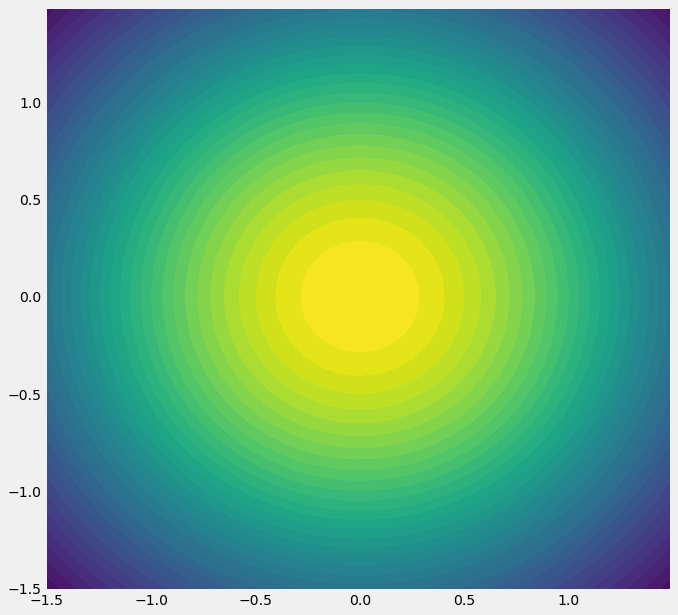

In [14]:
log_N = 8
true_bias = 2
X, Y, true_coef = make_regression(n_samples=2**log_N, n_features=1, n_targets=1, 
                                  bias=true_bias, noise=1, coef=True)
# shuffle
order = np.random.choice(X.shape[0], X.shape[0], replace=False)
X = X[order, :]
Y = Y[order]
alpha = 4
beta = (1 / 0.2) ** 2
delta = 0.05
X0 = np.arange(-1.51, 1.51, delta)
Y0 = np.arange(-1.51, 1.51, delta)
XX, YY = np.meshgrid(X0, Y0)
ZZ = np.exp(-(XX ** 2 + YY ** 2) / alpha) 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colors = sns.color_palette("tab20b", 20)
cs = ax.contourf(XX, YY, ZZ, 40)
#ax.clabel(cs, inline=1, fontsize=10)

In [15]:
# obliczenie kolejnych posteriorów według reguły brania od początku wszystkich
# przykłądów oraz brania nowo wyliczonych ostatnich mean i cov
m = []
s = []
sinv = []
m.append(np.array([0, 0]))
sinv.append(np.eye(2) / alpha)
s.append(np.linalg.inv(sinv[-1]))
for it in range(log_N):
    this_x = X[:2 ** it]
    this_y = Y[:2 ** it]
    sinv.append(sinv[-1] + beta * np.dot(this_x.T, this_x))
    s.append(np.linalg.inv(sinv[-1]))
    m.append(np.dot(s[-1], np.dot(sinv[-2], m[-1]) + beta * np.dot(this_x.T, this_y)))

In [16]:
# obliczenie kolejnych posteriorów według reguły brania tylko nowych przykładów
# biorąc nowe wartości mean i cov
m = []
s = []
sinv = []
m.append(np.array([0, 0]))
sinv.append(np.eye(2) / alpha)
s.append(np.linalg.inv(sinv[-1]))
for it in range(log_N):
    if it < 1:
        this_x = X[:2 ** it]
        this_y = Y[:2 ** it]
    else:
        this_x = X[2 ** (it - 1) - 1:2 ** it]
        this_y = Y[2 ** (it - 1) - 1:2 ** it]
    #print(it, '--->', 2**it,'; ', this_x.shape, this_y.shape)
    sinv.append(sinv[-1] + beta * np.dot(this_x.T, this_x))
    s.append(np.linalg.inv(sinv[-1]))
    m.append(np.dot(s[-1], np.dot(sinv[-2], m[-1]) + beta * np.dot(this_x.T, this_y)))

In [17]:
# obliczenie kolejnych posteriorów według reguły brania wszystkiego 
# od początku za każdym razem i odnosząc się do początkowych wartości mean i cov
m = []
s = []
sinv = []
m.append(np.array([0, 0]))
sinv.append(np.eye(2) / alpha)
s.append(np.linalg.inv(sinv[-1]))
for it in range(log_N):
    this_x = X[:2 ** it]
    this_y = Y[:2 ** it]
    sinv.append(sinv[0] + beta * np.dot(this_x.T, this_x))
    s.append(np.linalg.inv(sinv[1]))
    m.append(np.dot(s[1], np.dot(sinv[0], m[0]) + beta * np.dot(this_x.T, this_y)))

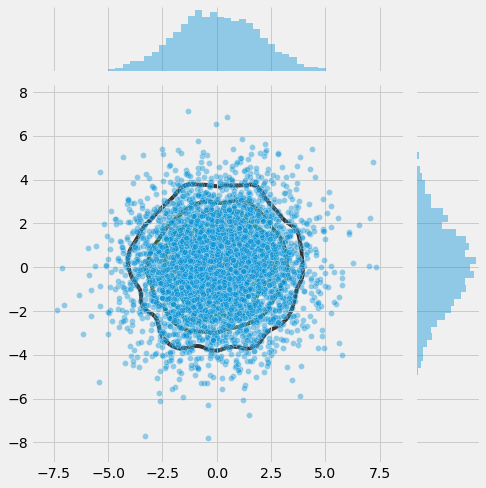

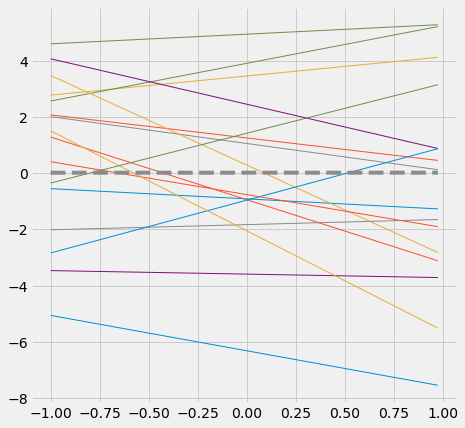

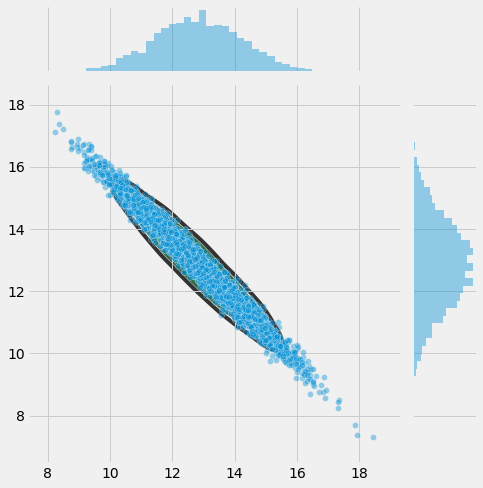

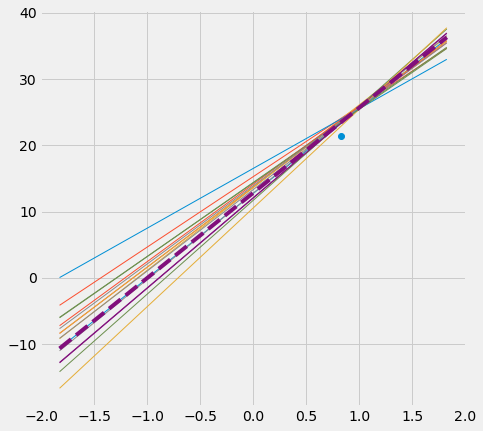

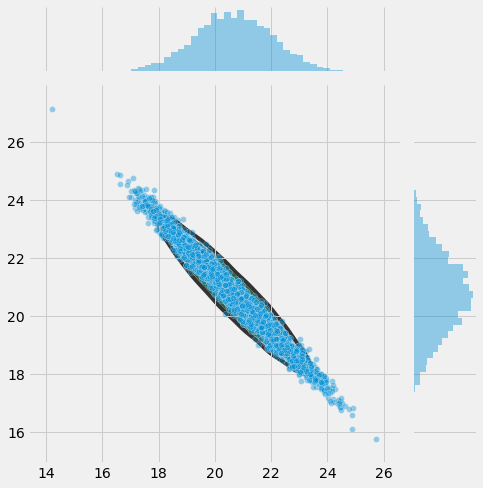

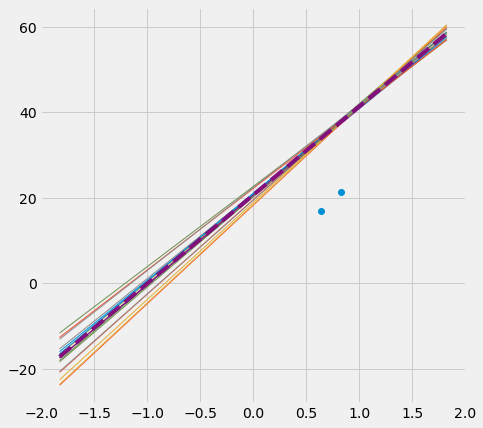

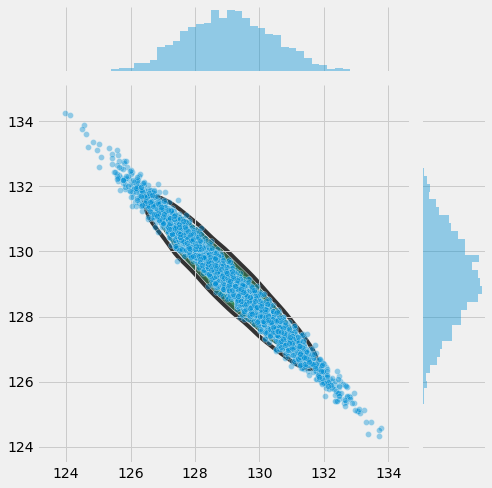

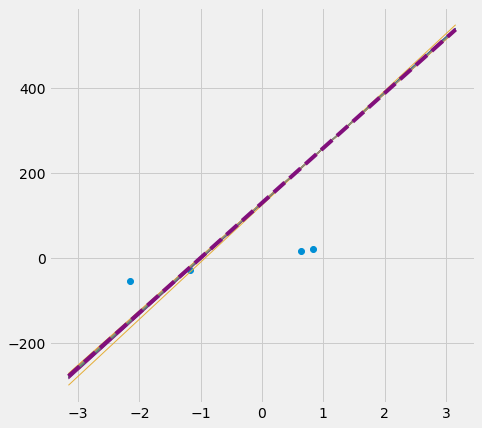

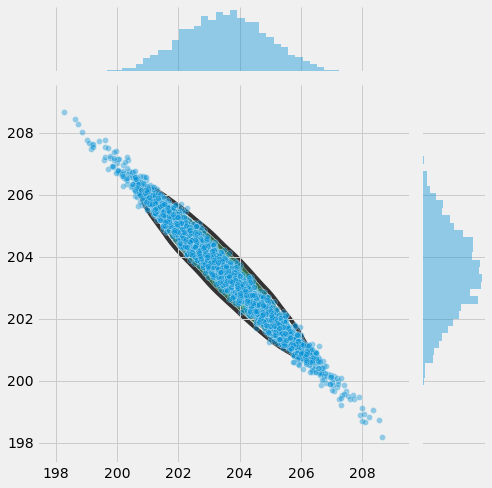

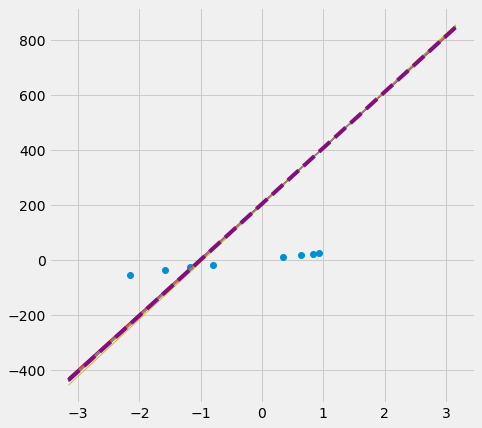

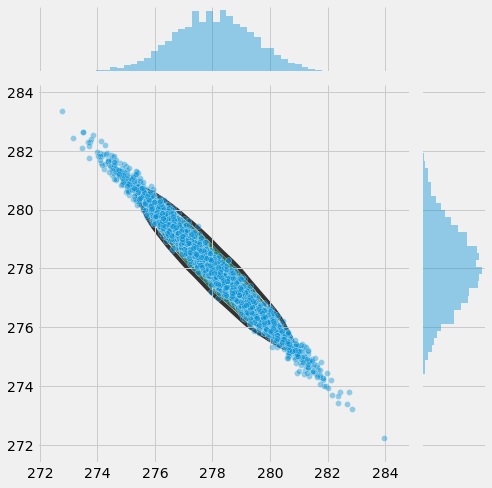

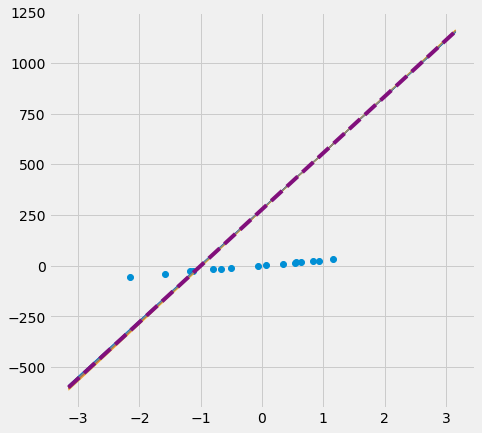

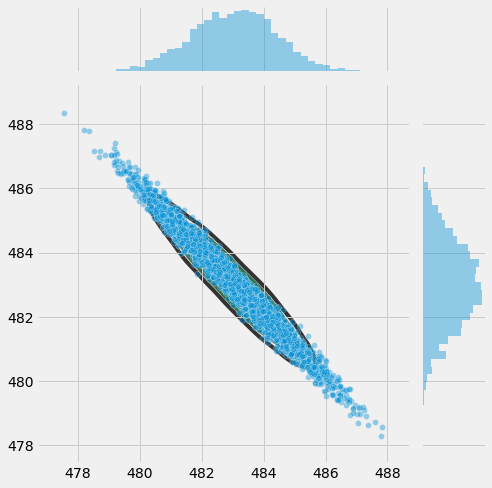

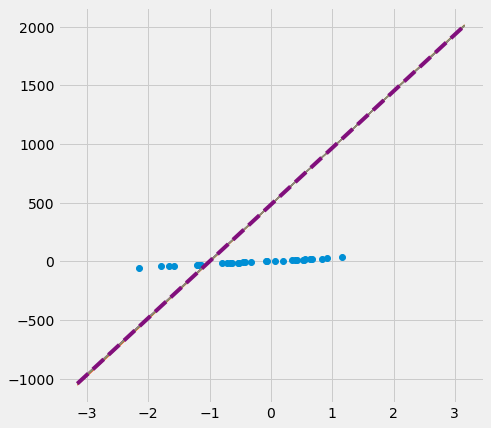

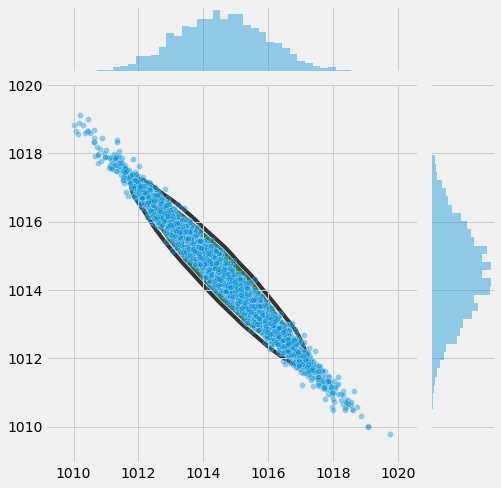

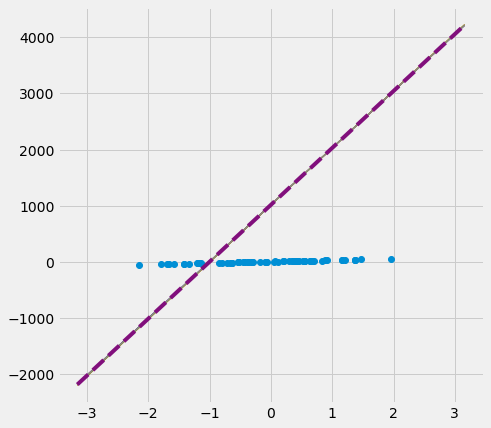

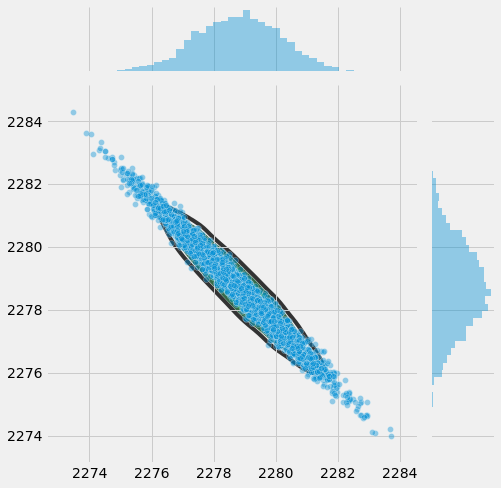

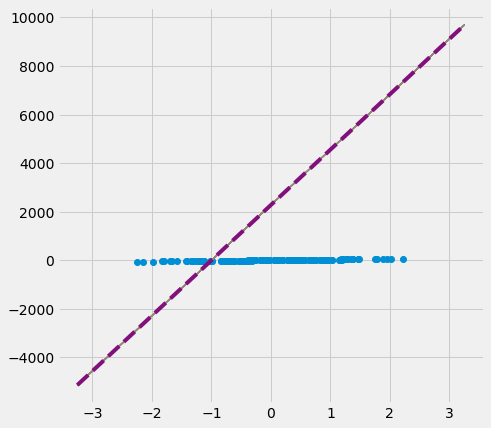

In [18]:
n_m = len(m)
#n_m = 5
to_draw = 16
x_lm = np.arange(-1, 1, 0.025)
eps = 1
for it in range(n_m):
    xd, yd = np.random.multivariate_normal(m[it], s[it], size=4096).T
    g = sns.jointplot(xd, yd, kind="scatter", size=7, alpha=0.4, 
                      edgecolor='white', stat_func=None)
    _ = g.plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    fig, ax = plt.subplots(1, 1, figsize=(6.8, 6.8))
    if it > 0:
        aa = np.abs(min(X[:2 ** (it - 1)]))
        bb = np.abs(max(X[:2 ** (it - 1)]))
        max_x = max(aa, bb)
        x_lm = np.linspace(-max_x - eps, max_x + eps, 5)
        ax.plot(X[:2 ** (it - 1)], Y[:2 ** (it - 1)], 'o')
    for k in range(to_draw):
        ax.plot(x_lm, xd[k] + yd[k] * x_lm, lw=1)
    xdm = np.mean(xd)
    ydm = np.mean(yd)
    ax.plot(x_lm, xdm + ydm * x_lm, '--')